<a href="https://colab.research.google.com/github/mansi878/Data-Science-Project/blob/main/Project_of_Data_Science_on_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK PREDICTION

# Abstract
The project was conducted on the German Credit Data with the purpose of exploring, processing and ultimately developing a machine learning model for predicting the Risk assessment for a given applicant. The dataset was explored to point out useful relationships between variables for future preprocessing steps, starting from the missing value treatment evaluations. Preparing both the categorical and numerical variables for the Machine Learning algorithms; missing values were imputed, numerical variables were Log-Scaled, Standardized and Clustered while categorical variables were One-Hot Encoded.


# Objective
The original dataset contains 1000 entries with 20 categorial/symbolic attributes. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

# Challenges
Machine Learning driven credit risk algorithms and their performance ranking using public datasets. We further discuss the challenges including data imbalance, dataset inconsistency, model transparency, and inadequate utilization of deep learning models.

# Data Processing
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

*  Age (numeric)
*   Sex (text: male, female)
*   Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
*  Housing (text: own, rent, or free)
*   Saving accounts (text - little, moderate, quite rich, rich)
*   Checking account (numeric, in DM - Deutsch Mark)
*   Credit amount (numeric, in DM)
*  Duration (numeric, in month)
* Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
*Risk (Value target - Good or Bad Risk)   



  







# Introduction
The task is to create a Machine Learning model that can predict the credit risk assessment for a given application. Due to the binary nature of the prediction (good or bad).

### Chapter-1
# Importing the Dependencies

In [ ]:
## It's Our library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Algorithm Models to be compared
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


## Evaluate our Machine Learning Model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



# Seeds were used for reliable randomness / reproducibility of the project
random.seed(42)

### Chapter-2
# Data Collection
## **German_Credit_Data.csv file**
Dataset is First 5 Rows & 5 Columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Dataset is shown by first 5 Rows and 5 columns
df = pd.read_csv('/content/drive/MyDrive/german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Chapter-2
# Exploratory Data Analysis(EDA)
Calculate summary statistics like mean, median, standard deviation, and quartiles for numerical features (e.g., Age, Credit Amount, Duration).
Count the frequency of each category for categorical features (e.g., Sex, Housing, Purpose).

In [ ]:
# Let's check NAN Values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
cluster               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# 2.1 Data Visualisation


* Create histograms, box plots, or violin plots to visualize the distribution of numerical features. This helps identify outliers and the shape of the data.  
*  Use bar plots or count plots to visualize the distribution of categorical features.
* Create scatter plots or pair plots to explore relationships between numerical features.
*  Box plots can be helpful to visualize the distribution of numerical features by different risk categories (Good vs. Bad)

### Below are initial visualisations for gaining simple insights to the data for:


* Gender Distribution
*  Risk Assessment Distribution
*   Credit Amount vs Gender
*   Numerical Distributions








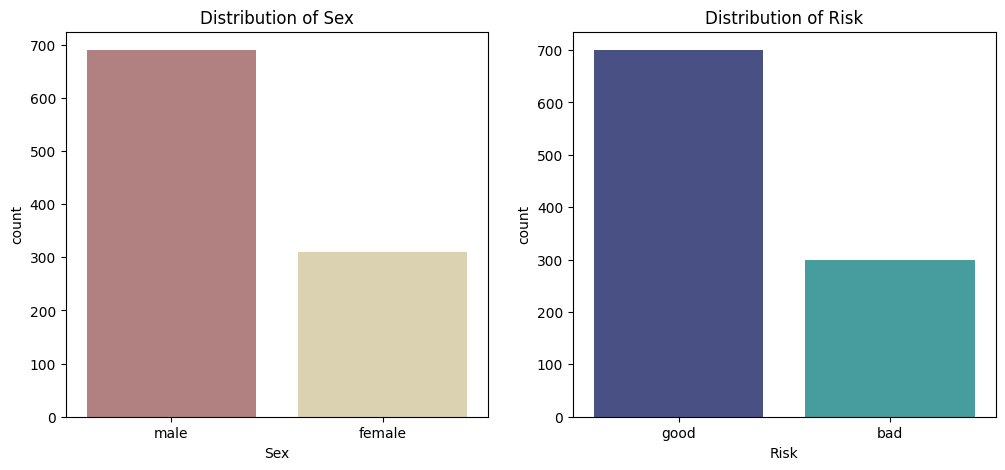

In [ ]:
# Gender Distribution & Risk Assessment Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for categorical variable 'Sex'
sns.countplot(x='Sex', data=df, palette="pink", ax=axes[0])
axes[0].set_title('Distribution of Sex')

# Plot for categorical variable 'Risk'
sns.countplot(x='Risk', data=df, palette="mako", ax=axes[1])
axes[1].set_title('Distribution of Risk')

plt.show()

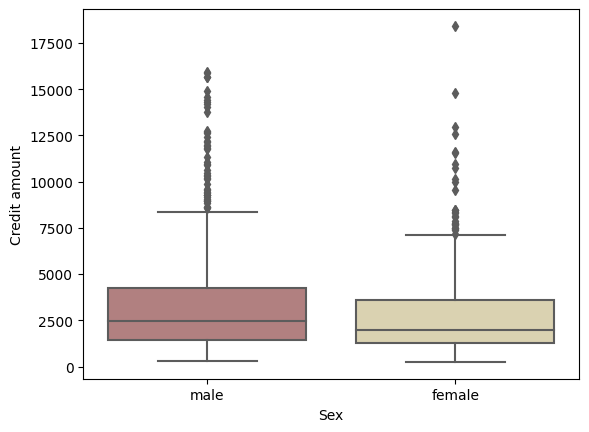

In [ ]:
# 'Sex' vs 'Credit amount'
sns.boxplot(x='Sex', y='Credit amount', data=df, palette = "pink")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

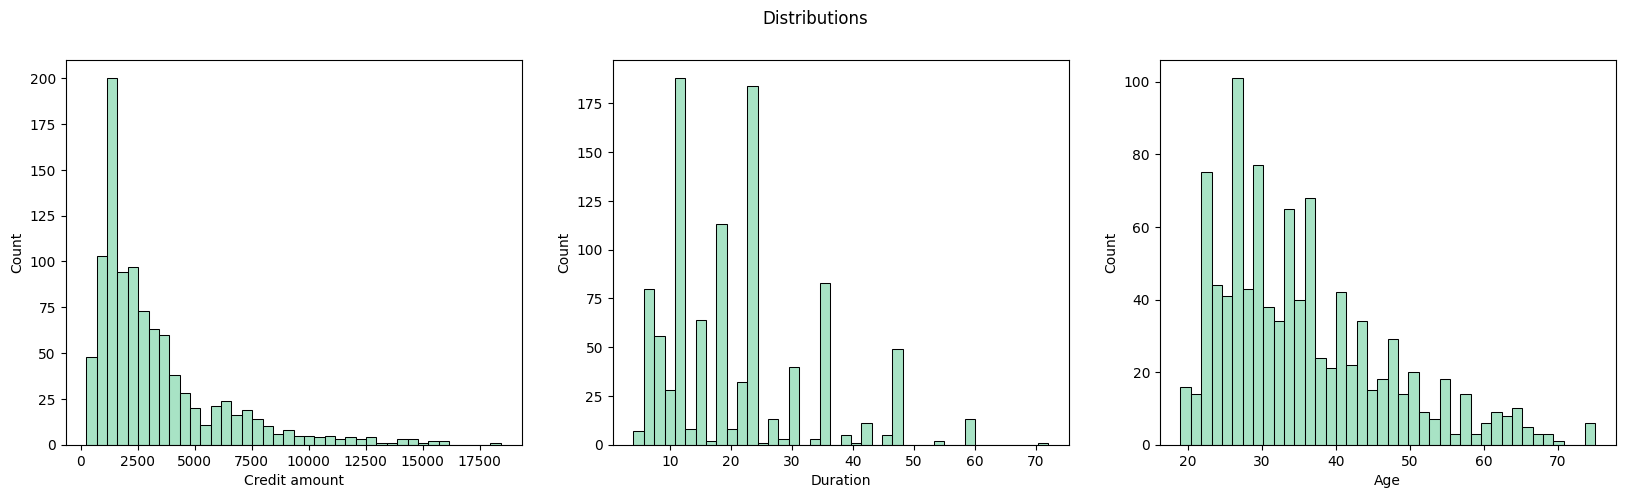

In [ ]:
# Numerical Distributions
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distributions')

sns.histplot(df['Credit amount'], bins=40, ax=ax[0])
sns.histplot(df['Duration'], bins=40, ax=ax[1])
sns.histplot(df['Age'], bins=40, ax=ax[2])

# 2.2 Categorical Variables
Several categorical variables that can provide valuable information for predicting whether a credit applicant is a good or bad risk. Here are some common categorical variables that you might encounter in such an analysis:


* Sex/Gender
* Housing
* Saving Accounts
*Checking Account
*  Purpose
* Job
* Risk




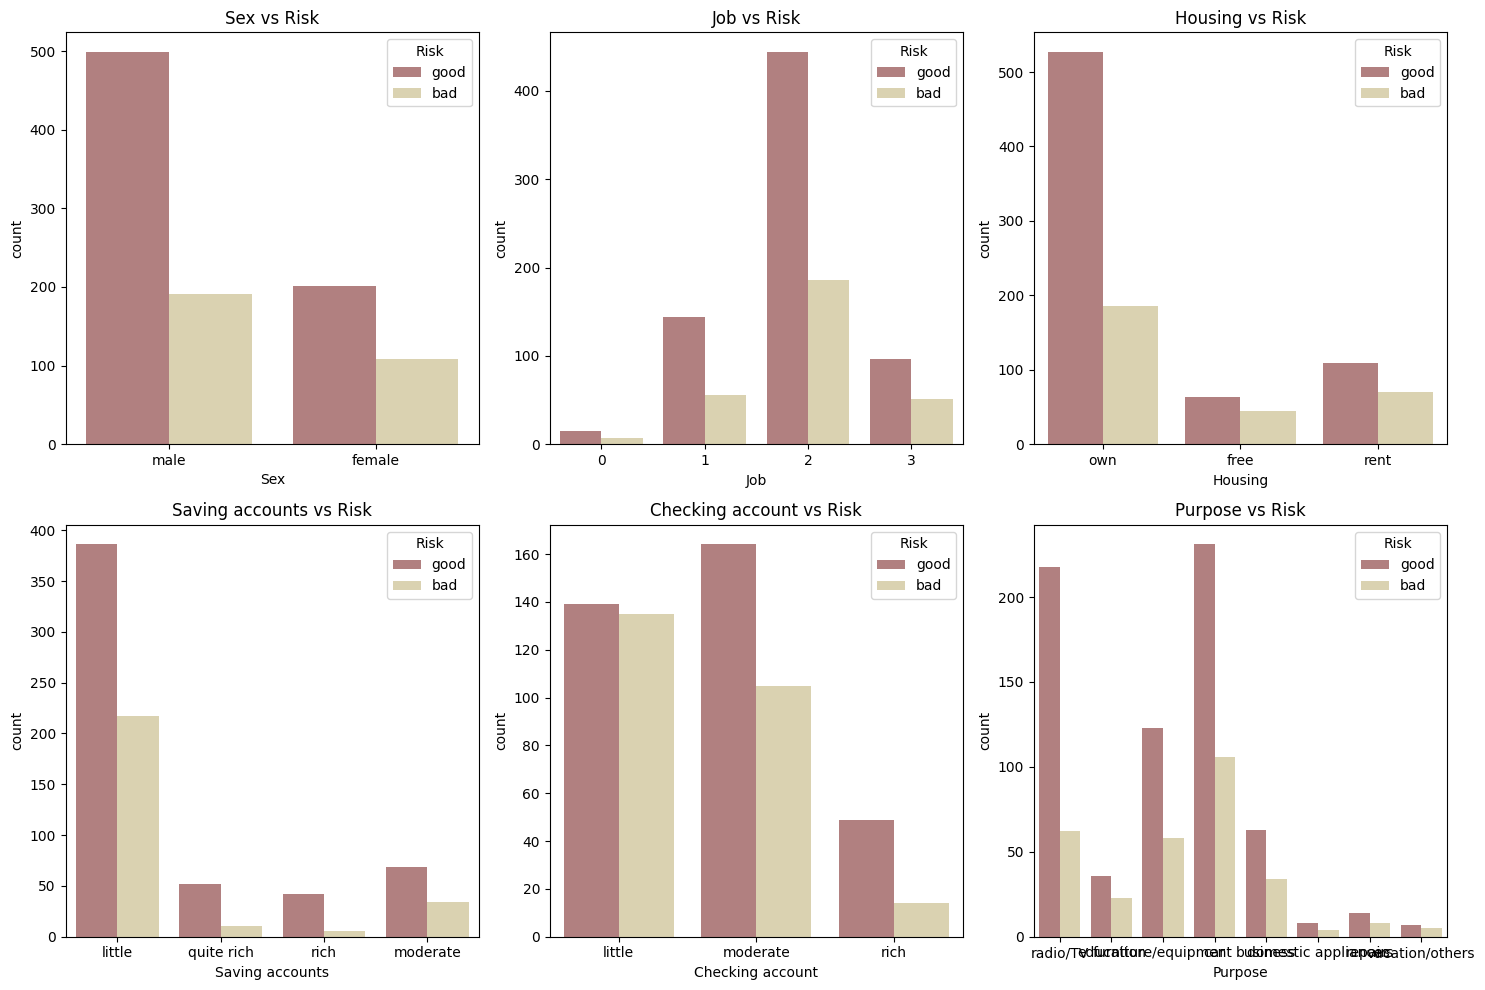

In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Categorical Variables
categorical_vars = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot each categorical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(categorical_vars):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index

    sns.countplot(x=var, hue="Risk", data=df, ax=axes[row, col], palette = "pink")
    axes[row, col].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# 2.3 Numerical Variables
Numerical variables in a Credit Risk Prediction analysis provide quantitative information about applicants and their financial situations. These variables are crucial for assessing creditworthiness. Here are common numerical variables that are often used in credit risk prediction:


* Age
* Credit Amount
*   Duration



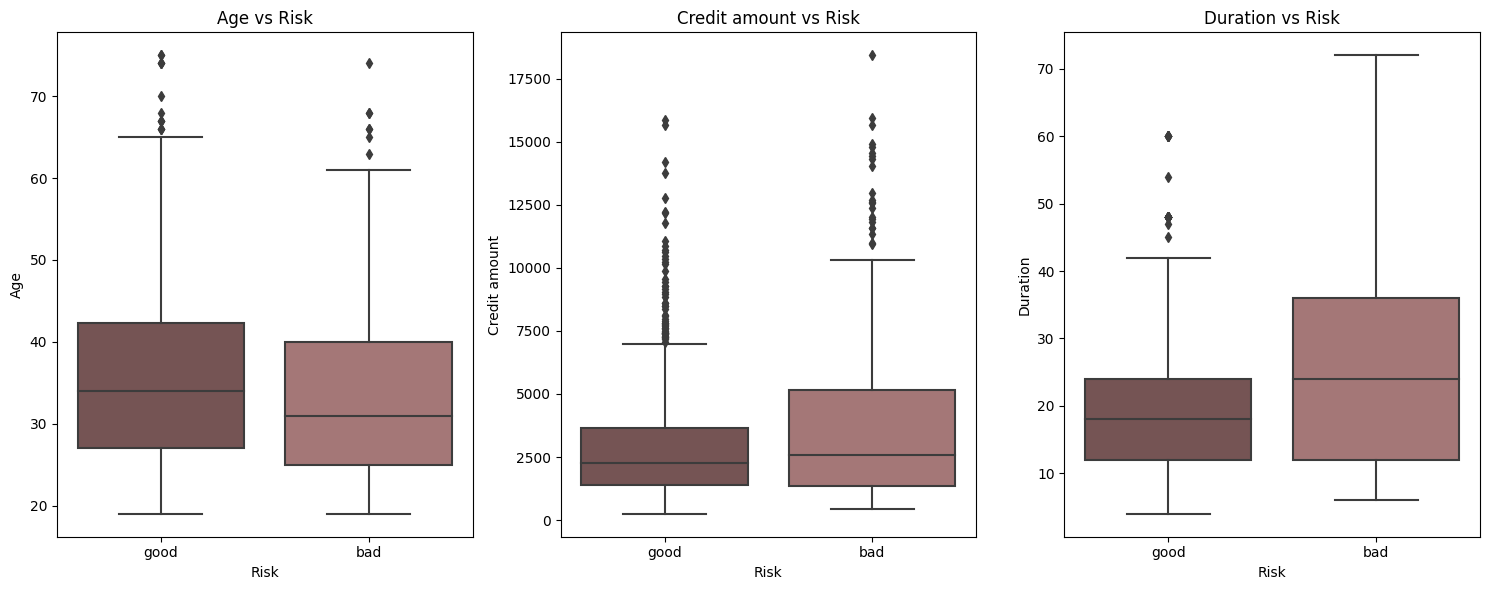

In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Numerical Variables
numerical_vars = ['Age', 'Credit amount', 'Duration']

# Set the palette to "pink"
sns.set_palette("pink")

# Plot each numerical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Risk', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# 2.4 Two Missing Variables
Check for missing values in the dataset and decide on a strategy for handling them by identifying the missing value in our dataset.


1.   **Data Imputation**: One common approach is to impute (fill in) missing values with appropriate values. The choice of imputation method depends on the nature of the variable and the dataset. Some common imputation strategies include:


* Mean Or Median
*  Mode
* Regression
*   Logistic Regression

Here we have to find missing value by Saving accounts and checking account by Risk.









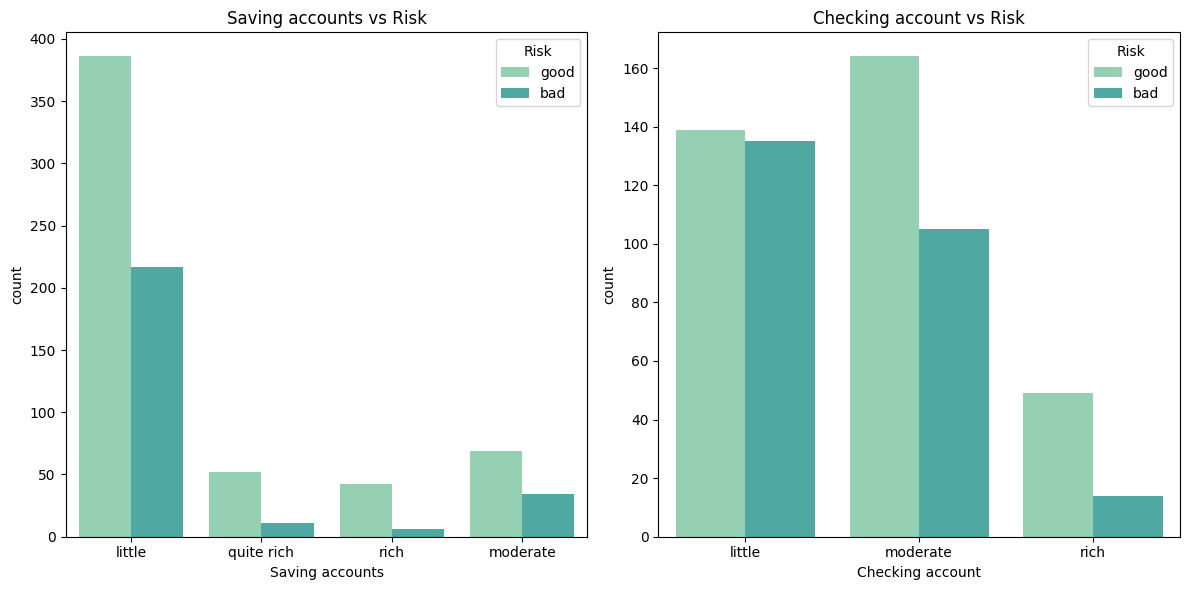

In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Set the palette to "pink"
sns.set_palette("mako_r")

# Plot countplots for 'Saving accounts' and 'Checking account'
sns.countplot(x='Saving accounts', hue='Risk', data=df, ax=axes[0])
axes[0].set_title('Saving accounts vs Risk')

sns.countplot(x='Checking account', hue='Risk', data=df, ax=axes[1])
axes[1].set_title('Checking account vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# 2.5 Two Missing Numericals
This is Same for Saving Accounts and Checking Account by Risk.

In [ ]:
# Statistical properties of 'Saving accounts'
saving_accounts_stats = df['Saving accounts'].describe()

# Statistical properties of 'Checking account'
checking_account_stats = df['Checking account'].describe()

# Display the statistical properties
print("Saving accounts:")
print(saving_accounts_stats)
print()

print("Checking account:")
print(checking_account_stats)

Saving accounts:
count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

Checking account:
count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


# 2.6 Other Categorical Variables with unique properties of explore
In a credit risk prediction analysis, examining the relationship between categorical variables and credit risk based on the purpose of the credit can provide valuable insights. Different purposes for obtaining credit can be associated with varying levels of risk. Here are some common categorical variables and their unique properties when analyzed in the context of "Purpose" vs. "Risk":


*   Housing: (eg; Own, Rent, Free)
*   Purpose: (eg; radio/TV, Education, furniture/equipment, car, business, Domestic appliances, repairs, Vacation/others)




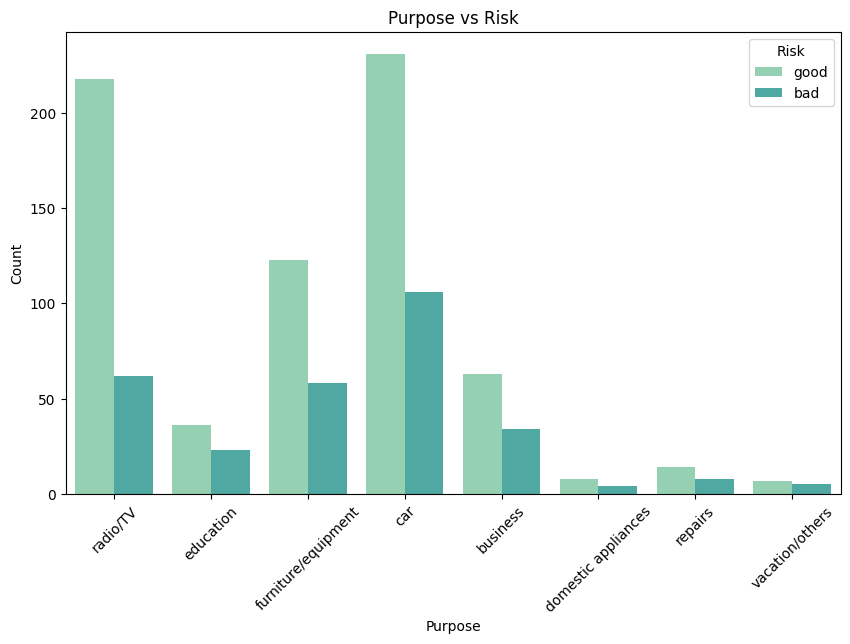

In [ ]:
# Create a stacked bar chart for 'Purpose' vs 'Risk'
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', hue='Risk', data=df)
plt.title('Purpose vs Risk')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk', loc='upper right')
plt.show()

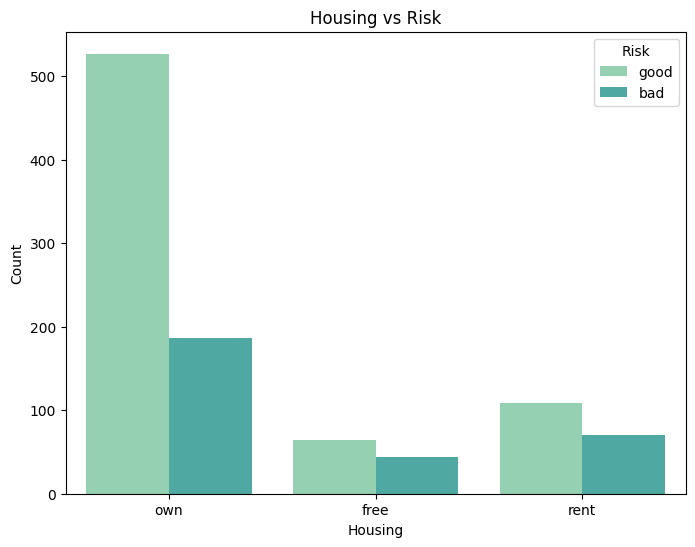

In [ ]:
# Create a grouped bar chart for 'Housing' vs 'Risk'
plt.figure(figsize=(8, 6))
sns.countplot(x='Housing', hue='Risk', data=df)
plt.title('Housing vs Risk')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(title='Risk', loc='upper right')
plt.show()

#2.7 Correlations between Variables  
Compute and visualize correlations between numerical features. This can help identify which features are most strongly correlated with the target variable (Risk).
Use a heatmap to visualize the correlation matrix.


<ipython-input-110-375a663054b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


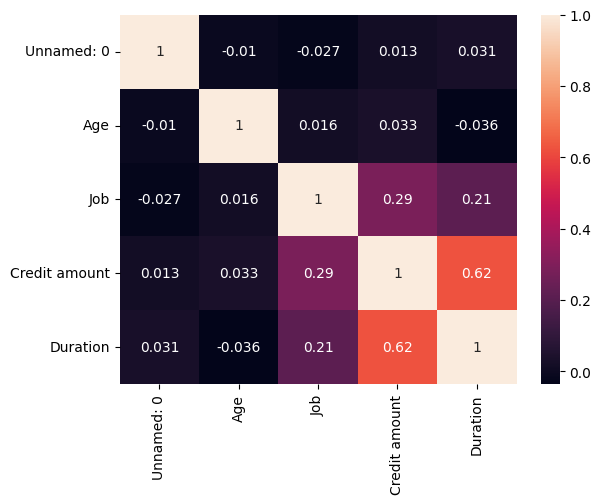

In [ ]:
# Heatmap to show correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Chapter-3
# Data Preprocessing


# 3.1 Missing Value Treatment
As Shown below:
*   Saving accounts
*  Checking account


variables have 20% and 40% missing data in their columns, respectively.
This can be adressed by mode imputation (due to the categorical nature of data), constant imputation or a ML Imputation with cross-validation such as k-NN Imputation.
The most successful method is investigated below.





In [ ]:
print(df['Saving accounts'].value_counts())
print(df['Checking account'].value_counts())

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# 3.2 Imputation with a constant value or new category
When dealing with categorical variables with missing values in credit risk prediction or any other machine learning task, you have several options for imputation, and choosing the right approach depends on the nature of the variable and the dataset. Two common imputation strategies for categorical variables are:

* Imputation with a Constant Value (e.g., "Unknown" or "Other")   
*  Imputation with a New Category



In [ ]:
# Assuming df is your DataFrame
df_constant = pd.read_csv('/content/drive/MyDrive/german_credit_data.csv')

# Filling NaN values with 'Unknown'
df_constant['Saving accounts'].fillna('Unknown', inplace=True)
df_constant['Checking account'].fillna('Unknown', inplace=True)

# 3.3 Imputation with Mode
Imputing missing values with the mode (most frequent category) is a common strategy for handling missing data in categorical variables, including in credit risk prediction. Imputing with the mode is appropriate when you believe that the missing values are missing completely at random (MCAR) or missing at random (MAR), and you want to maintain the distribution of the existing categories as much as possible. Here's how you can impute missing values with the mode in a categorical variable for credit risk prediction
  



In [ ]:
# Filling NaN values with the mode (most frequent category)
df_mode = pd.read_csv('/content/drive/MyDrive/german_credit_data.csv')

df_mode['Saving accounts'].fillna(df_mode['Saving accounts'].mode()[0], inplace=True)
df_mode['Checking account'].fillna(df_mode['Checking account'].mode()[0], inplace=True)

# 3.4 Imputation with Logistic Regression
Imputing missing categorical values using logistic regression is a more advanced technique that takes into account relationships between variables to predict missing values based on the values of other features. This method can be especially useful when you suspect that missingness is not random (i.e., it depends on other variables) and when you want to capture more information from your data.

Here's how you can perform imputation with logistic regression for credit risk prediction:


*   Divide Data
*   Data Preparation

In [ ]:
# Creating an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Selecting categorical columns to be encoded
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Copying the dataframe to avoid changing the original one
df_encoded = df.copy()

# Encoding the categorical columns
df_encoded[cat_cols] = encoder.fit_transform(df[cat_cols])

# Creating an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Applying the imputer
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns = df.columns)

# Decoding the categorical columns back to their original form
df_encoded[cat_cols] = encoder.inverse_transform(df_encoded[cat_cols])

# 3.5 Missing Values for Credit Risk
To create a DataFrame that indicates whether values are missing in your credit risk prediction dataset, you can use the Pandas library in Python. You can create a new DataFrame with the same shape as your original dataset, where each cell contains a Boolean value indicating whether the corresponding cell in the original dataset is missing or not.

In [ ]:
# Creating a dataframe indicating whether values are missing
missing_df = df.isnull()

# Calculating the correlation between missingness of different columns
corr = missing_df.corr()

print(corr)

                  Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  \
Unnamed: 0               NaN  NaN  NaN  NaN      NaN              NaN   
Age                      NaN  NaN  NaN  NaN      NaN              NaN   
Sex                      NaN  NaN  NaN  NaN      NaN              NaN   
Job                      NaN  NaN  NaN  NaN      NaN              NaN   
Housing                  NaN  NaN  NaN  NaN      NaN              NaN   
Saving accounts          NaN  NaN  NaN  NaN      NaN         1.000000   
Checking account         NaN  NaN  NaN  NaN      NaN         0.142364   
Credit amount            NaN  NaN  NaN  NaN      NaN              NaN   
Duration                 NaN  NaN  NaN  NaN      NaN              NaN   
Purpose                  NaN  NaN  NaN  NaN      NaN              NaN   
Risk                     NaN  NaN  NaN  NaN      NaN              NaN   

                  Checking account  Credit amount  Duration  Purpose  Risk  
Unnamed: 0                     NaN            

# 3.6 Target Variables
The target variable itself is often categorical, representing whether an applicant is a good or bad credit risk. This is what you want to predict.Visualize the distribution of the target variable (Risk). You may want to see if it's imbalanced (i.e., significantly more 'Good' than 'Bad' or vice versa).

In [ ]:
# Assuming df is your DataFrame and 'Risk' is the target variable
df_t = pd.read_csv('/content/drive/MyDrive/german_credit_data.csv')
df_t['Risk'] = df_t['Risk'].apply(lambda x: 1 if x=='good' else 0)

# List of imputers
imputers = {
    'constant': SimpleImputer(strategy='constant', fill_value='Unknown'),
    'mode': SimpleImputer(strategy='most_frequent'),
    'knn': KNNImputer(n_neighbors=5)
}

# Initialize encoder
encoder = OrdinalEncoder()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_t.drop('Risk', axis=1), df_t['Risk'],
                                                    test_size=0.2, random_state=42)

# Iterating over imputers
for name, imputer in imputers.items():
# Copy the train and test sets
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply encoding for knn imputer
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # Perform imputation
    X_train_imputed[['Saving accounts', 'Checking account']] = imputer.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
    X_test_imputed[['Saving accounts', 'Checking account']] = imputer.transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # If knn, inverse transform after imputation
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # One-hot encoding for the categorical features
    X_train_imputed = pd.get_dummies(X_train_imputed)
    X_test_imputed = pd.get_dummies(X_test_imputed)

    # Training the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_imputed, y_train)

    # Predicting the test set results and calculating the accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Imputer: {name}, Accuracy: {accuracy}')

Imputer: constant, Accuracy: 0.725
Imputer: mode, Accuracy: 0.7
Imputer: knn, Accuracy: 0.7


In [ ]:
df_constant.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# 3.7 Further Data Preprocessing
As shown in the data exploration part, the numerical values are different in their scales from each other and log-scaling can help in this case.
Log-Scaling of the numerical columns:


*  Age
*  Credit Amount
*  Duration

Log-scaling, also known as logarithmic scaling, is a common transformation used for numerical columns in datasets, especially when the data spans a wide range or includes very large values. This transformation can be applied to numerical columns in your credit risk prediction dataset to make the data more suitable for certain machine learning algorithms that are sensitive to the scale of the features.


In [ ]:
# List of numerical columns to be log transformed
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Apply log(1 + x) transformation to all numerical columns
for col in numerical_columns:
    df_constant[col] = np.log1p(df_constant[col])

# Print the new DataFrame to verify
df_constant.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,4.219508,male,2,own,Unknown,little,7.064759,1.945910,radio/TV,good
1,1,3.135494,female,2,own,little,moderate,8.691483,3.891820,radio/TV,bad
2,2,3.912023,male,1,own,little,Unknown,7.648263,2.564949,education,good
3,3,3.828641,male,2,free,little,little,8.972464,3.761200,furniture/equipment,good
4,4,3.988984,male,2,free,little,little,8.491055,3.218876,car,bad


# 3.8 Categorical Variables for all Machine Learning Models
This method is suitable since there are small numbers of possible values for all categorical variables.

When preparing your dataset for credit risk prediction and performing one-hot encoding on categorical variables, you need to determine which categorical columns should be one-hot encoded. Typically, you want to one-hot encode categorical variables that are non-ordinal (i.e., there is no meaningful order among the categories) and have more than two categories. Here's a list of categorical columns that are often suitable for one-hot encoding in a credit risk prediction dataset:

* Sex: (e.g., "Male" or "Female")
* Job: (e.g., "Unskilled and non-resident," "Skilled," "Highly skilled")
* Housing: (e.g., "Little," "Moderate," "Quite rich," "Rich")
* Saving accounts: (e.g., "Little," "Moderate," "Quite rich," "Rich")
* Checking account: (e.g., "< 0 DM," "0 to 200 DM," "> 200 DM," "No checking")
* Purpose: (e.g., "Car," "Furniture/equipment," "Education," etc.)
* Risk:  (if it's categorical)




In [ ]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_constant, columns=categorical_columns)

# Print the new DataFrame to verify
df_encoded.head()

,Unnamed: 0,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0,4.219508,7.064759,1.945910,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,3.135494,8.691483,3.891820,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,3.912023,7.648263,2.564949,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,3.828641,8.972464,3.761200,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,4,3.988984,8.491055,3.218876,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# 3.9 Graph of Numerical Columns
Log-scaling, also known as logarithmic scaling, is a common transformation used for numerical columns in datasets, especially when the data spans a wide range or includes very large values. This transformation can be applied to numerical columns in your credit risk prediction dataset to make the data more suitable for certain machine learning algorithms that are sensitive to the scale of the features.



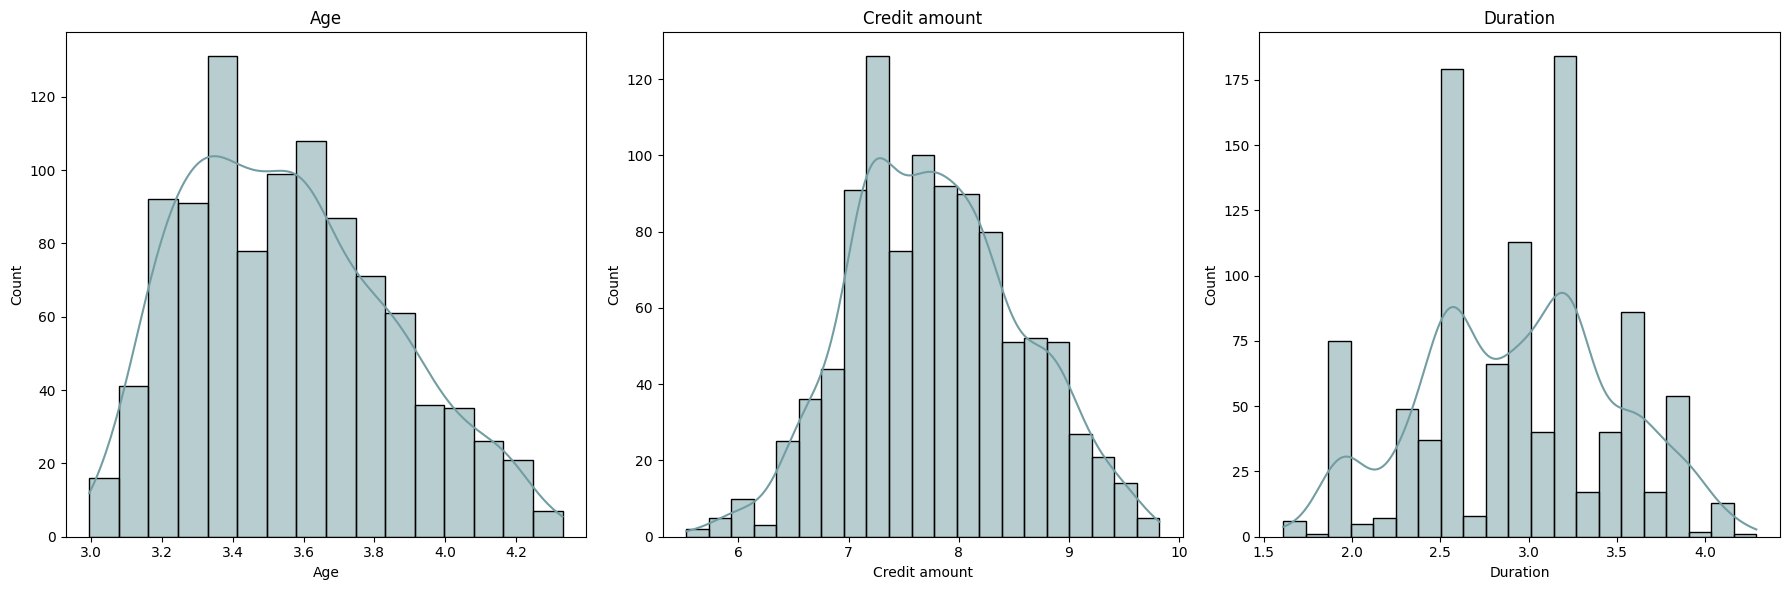

In [ ]:
# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Number of columns for the subplot grid
num_cols = 3

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(18, 6))

# Draw a histogram and KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_encoded[col], kde=True, color="#729da3", ax=axs[i])
    axs[i].set_title(col)

# Display the figure with subplots
plt.tight_layout()
plt.show()

In [ ]:
df_excluded = df_encoded.iloc[:, 1:]

In [ ]:
df_excluded.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,4.219508,7.064759,1.945910,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,3.135494,8.691483,3.891820,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3.912023,7.648263,2.564949,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.828641,8.972464,3.761200,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,3.988984,8.491055,3.218876,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


### Chapter-4
# Clustering by Numerical data to train our Machine Learning Models
Clustering numerical data before training machine learning models for credit risk prediction can be a useful preprocessing step. Clustering can help identify patterns and group similar data points together, which may enhance the predictive power of your models.


In [ ]:
# Create a copy of the DataFrame
df_encoded_copy = df_excluded.copy()

# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Create a scaler object
scaler = StandardScaler()

# Apply the scaler only to the numerical columns of the DataFrame copy
df_encoded_copy[numerical_columns] = scaler.fit_transform(df_encoded_copy[numerical_columns])

# Print the new DataFrame to verify
print(df_encoded_copy.head())

        Age  Credit amount  Duration  Sex_female  Sex_male  Job_0  Job_1  \
0  2.282879      -0.933992 -1.822056           0         1      0      0   
1 -1.438777       1.163149  1.741206           1         0      0      0   
2  1.227217      -0.181750 -0.688500           0         1      0      1   
3  0.940950       1.525385  1.502020           0         1      0      0   
4  1.491441       0.904761  0.508940           0         1      0      0   

   Job_2  Job_3  Housing_free  ...  Purpose_business  Purpose_car  \
0      1      0             0  ...                 0            0   
1      1      0             0  ...                 0            0   
2      0      0             0  ...                 0            0   
3      1      0             1  ...                 0            0   
4      1      0             1  ...                 0            1   

   Purpose_domestic appliances  Purpose_education  \
0                            0                  0   
1                     

# 4.1 Graph of K=3 For Good Candidate
You'll need to decide how many clusters (K) you want to create. You can use techniques like the elbow method, silhouette score, or domain knowledge to help determine the optimal number of clusters for your data. Apply the chosen clustering algorithm to your numerical data, specifying the number of clusters (K).

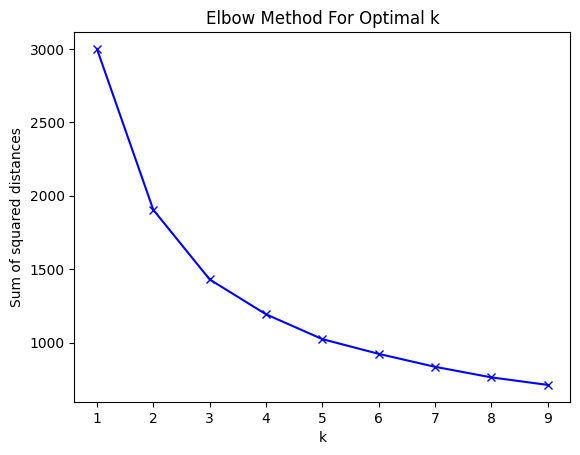

In [ ]:
# Extract only the numerical columns for k-means clustering
numerical_data = df_encoded_copy[numerical_columns]

# Calculate sum of squared distances
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit(numerical_data)
    ssd.append(km.inertia_)  # Sum of squared distances

# Plot sum of squared distances / Inertia
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Define the number of clusters
n_clusters = 3

# Create a k-means object and fit it to the numerical data
km = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10)
clusters = km.fit_predict(df_encoded_copy[numerical_columns])

# 4.2 3D GRAPH OF CLUSTERS

It seems like you're describing a 3D graph that displays clusters of data points, and you believe that this visualization represents a successful and insightful selection of data points for clustering. That's great to hear! Clustering is a common technique in data analysis and machine learning used to group similar data points together.

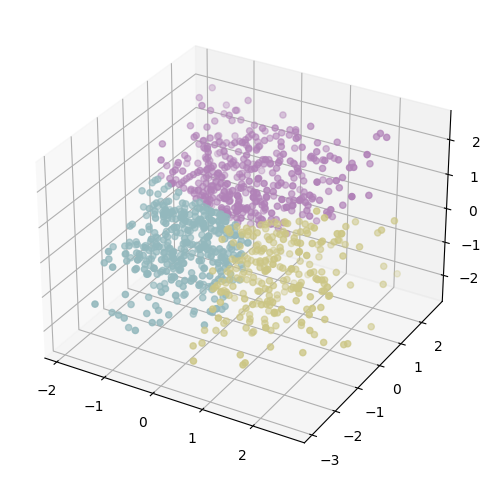

In [ ]:
# Create a new figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for each data point
colors = ['#b182b8', '#93b8bd', '#ccc685']

# Plot each cluster with specific colors
for i in range(n_clusters):
    ax.scatter(df_encoded_copy.loc[clusters == i, 'Age'],
               df_encoded_copy.loc[clusters == i, 'Credit amount'],
               df_encoded_copy.loc[clusters == i, 'Duration'],
               c=colors[i])  # Assign specific color to each cluster

plt.show()

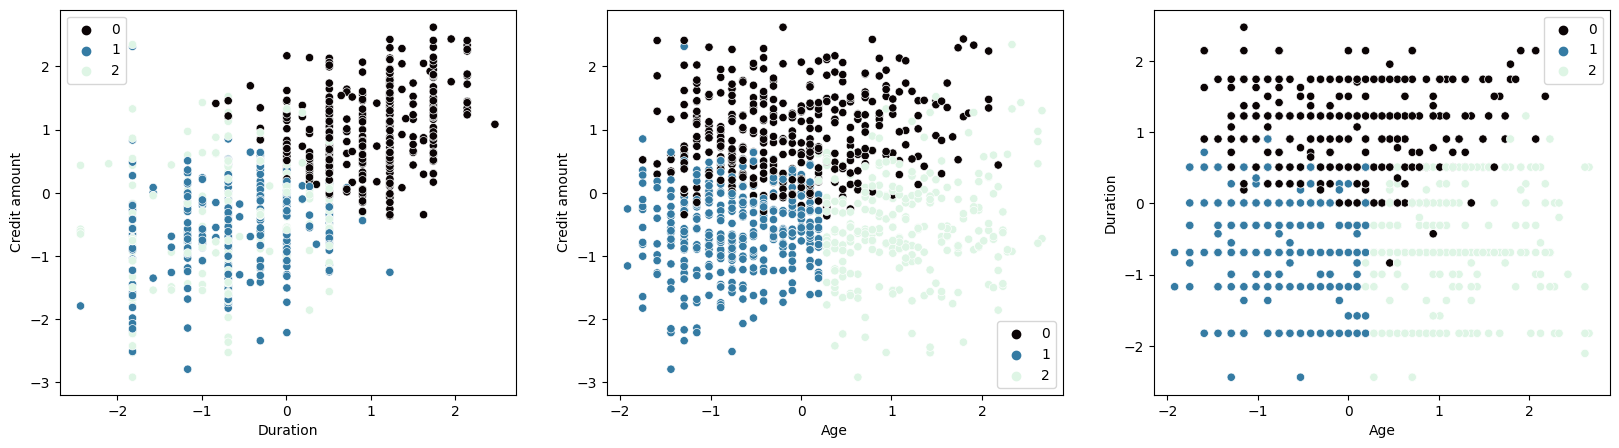

In [ ]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))

sns.scatterplot(x='Duration', y='Credit amount', hue=clusters, data=df_encoded_copy, ax=ax[0], palette='mako')
sns.scatterplot(x='Age', y='Credit amount', hue=clusters, data=df_encoded_copy, ax=ax[1], palette='mako')
sns.scatterplot(x='Age', y='Duration', hue=clusters, data=df_encoded_copy, ax=ax[2], palette='mako')

plt.show()

# 4.3 CLUSTER LABELS OF DATAFRAME

This code snippet will add a new column named 'Cluster_Labels' to your DataFrame df with the cluster labels you have assigned to each data point.Let's  matches the number of rows in your DataFrame 'df'.

In [ ]:
# the cluster labels as a new column to the DataFrame
df_encoded_copy['cluster'] = clusters

Assuming you have a Pandas DataFrame named 'original_df' and a list of cluster labels called 'cluster_labels', you can add the cluster labels as a new column to your original DataFrame like this, This code snippet will add a new column named 'Cluster_Labels' to your original DataFrame 'original_df' with the cluster labels you have assigned to each data point.

In [ ]:
# Add the cluster labels to your original DataFrame
df['cluster'] = clusters

# Perform groupby operation on the original DataFrame
df.groupby('cluster')[numerical_columns].mean()

,Age,Credit amount,Duration
cluster,,,
0,34.016043,5671.213904,32.256684
1,27.872973,1733.000000,14.189189
2,48.871094,1988.335938,14.019531


### Chapter-5
# MACHINE LEARNING
For reference, the current form of the preprocessed dataframe is:

# 5.1 Machine Learning models will be implemented for the dataset
There are further classification on Machine Learning Model are as follows:


* K-Nearest Neighbors (KNN)
* Decision Trees (DT)
* Logistic Regression (LR)
* Multilayer Perceptrons (MLP)
* Support Vector Machines (SVM)




In [ ]:
df_final = df_encoded_copy.copy()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Credit amount                1000 non-null   float64
 2   Duration                     1000 non-null   float64
 3   Sex_female                   1000 non-null   uint8  
 4   Sex_male                     1000 non-null   uint8  
 5   Job_0                        1000 non-null   uint8  
 6   Job_1                        1000 non-null   uint8  
 7   Job_2                        1000 non-null   uint8  
 8   Job_3                        1000 non-null   uint8  
 9   Housing_free                 1000 non-null   uint8  
 10  Housing_own                  1000 non-null   uint8  
 11  Housing_rent                 1000 non-null   uint8  
 12  Saving accounts_Unknown      1000 non-null   uint8  
 13  Saving accounts_lit

In [ ]:
df_final.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,cluster
0,2.282879,-0.933992,-1.822056,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2
1,-1.438777,1.163149,1.741206,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.227217,-0.181750,-0.688500,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2
3,0.940950,1.525385,1.502020,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1.491441,0.904761,0.508940,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


# 5.2 LOGISTIC REGRESSION (LR)
Cross validation for logistic regression was also carried out before training the model.

In [ ]:
X = df_final.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = df_final['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.3 HYPERPARAMETER GRID
Setting up a hyperparameter grid is a crucial step when performing hyperparameter tuning for machine learning models. A hyperparameter grid is a dictionary or list that specifies the range of values you want to search through for each hyperparameter. You can then use techniques like grid search or random search to find the best combination of hyperparameters.

In [ ]:
# setup the hyperparameter grid
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# instantiate the logistic regression model with best parameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.765
              precision    recall  f1-score   support

           0       0.65      0.44      0.53        59
           1       0.79      0.90      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200

